<a href="https://colab.research.google.com/github/jamissonfreitas/IN1167/blob/master/report_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import io
import requests
# lib to plot the data
import matplotlib.pyplot as plt
# lib to use the decompositio in the time series
from statsmodels.tsa.seasonal import seasonal_decompose
# lib to use the acf and pcf correlations
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# lib to organize the data in data frame
from pandas import DataFrame
# lib to organize the time series by periods
from pandas import TimeGrouper

# lib to import the stocastic basic models
from statsmodels.tsa.api import Holt
# lib to import the ar model
from statsmodels.tsa.ar_model import AR

from statsmodels.tsa.arima_model import ARMA, ARIMA

!pip install arch

     |████████████████████████████████| 716kB 3.5MB/s 


# Constants

In [0]:
H = 6
V = 12

# GOLD CLOSE PRICE, 97 SUCCESSIVE TRADING DAYS


## Data

In [0]:
url='https://raw.githubusercontent.com/FinYang/tsdl/master/data-raw/commod/gold.dat'
s = requests.get(url).content
data = ' '.join([l.strip() for l in s.decode('utf-8').split('\n')[1:]])
serie = pd.Series(
    data.split(' '),
    index=pd.date_range(start ='1-1-1997', end ='4-7-1997', freq ='D')
) 

## Plot Serie

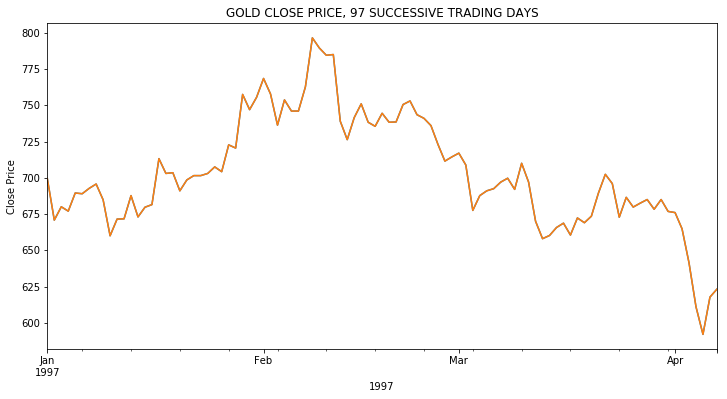

In [12]:
serie = serie.astype(float)
serie.plot(figsize=(V,H))
plt.xlabel('1997')
plt.ylabel('Close Price')
plt.title('GOLD CLOSE PRICE, 97 SUCCESSIVE TRADING DAYS')
serie.plot()

### Diff

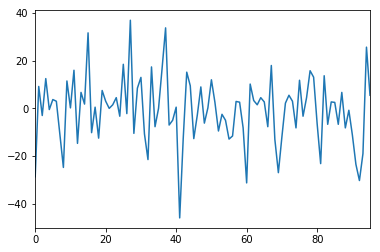

In [13]:
import numpy as np
s_diff = np.diff(serie)
s_diff = pd.Series(s_diff)
s_diff.plot()

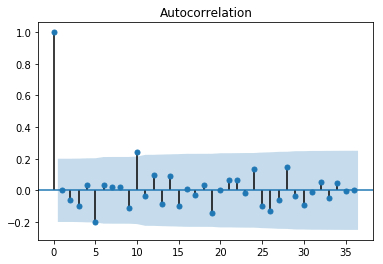

In [14]:
plot_acf(s_diff, lags=36)
plt.show()

## ACF

<Figure size 432x864 with 0 Axes>

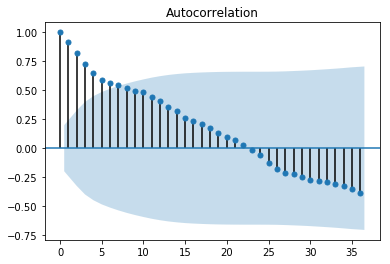

In [15]:
plt.figure(figsize=(H,V))
plot_acf(serie, lags=36)
plt.show()

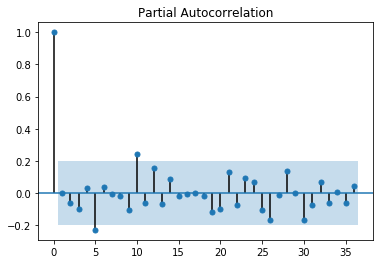

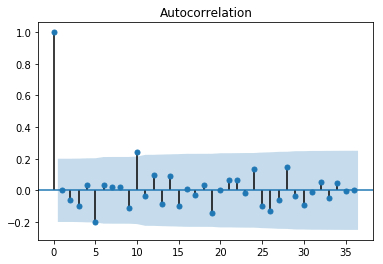

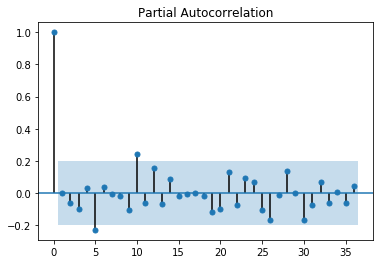

In [16]:
plot_acf(s_diff, lags=36)

plot_pacf(s_diff, lags=36)

## PACF

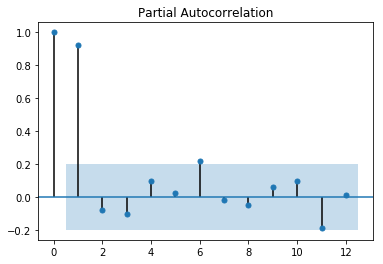

In [17]:
plot_pacf(serie, lags=12)
plt.show()

## Seasonal decompose

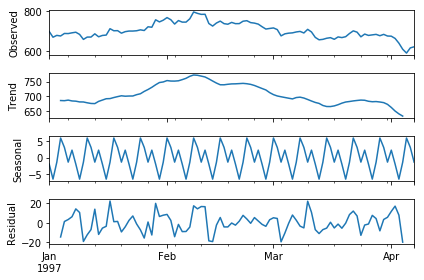

In [18]:
decompose = seasonal_decompose(serie, model='additive')
decompose.plot()
plt.show()

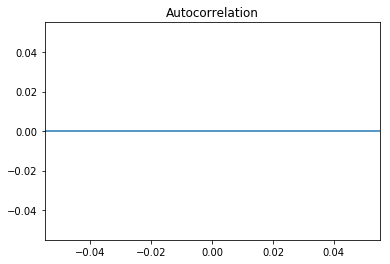

In [19]:
plot_acf(decompose.resid, lags=36)
plt.show()

## Data train and test

In [20]:
size = len(serie)
print(size)
l = int((7*size)/10)
print(l)

# original serie
serie_train = serie[:l]
serie_test = serie[l:]

size = len(s_diff)
print(size)
l = int((7*size)/10)
print(l)

# diff serie
s_diff_train = s_diff[:l]
s_diff_test = s_diff[l:]

97
67
96
67


## Models

### Holt-Winters

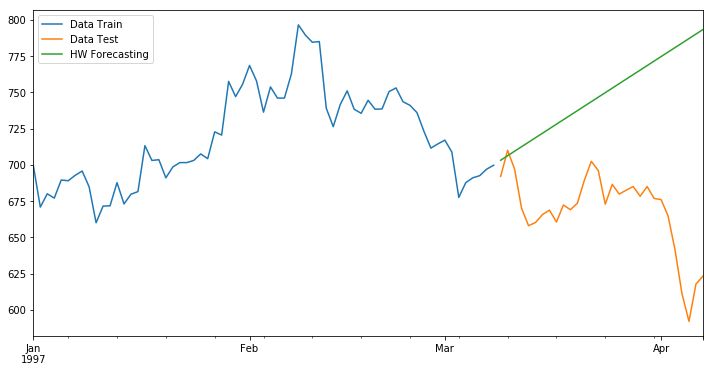

In [21]:
plt.figure(figsize=(V,H))

# fit the data
hw = Holt(serie_train).fit(smoothing_level=0.8, smoothing_slope=0.9)

# original serie
serie_train.plot(label='Data Train')

# original serie
serie_test.plot(label='Data Test')

# plot the data
# hw.fittedvalues.plot(label='HW Fit')

# predict
predict = hw.predict(start=serie_test.index[0], end=serie_test.index[-1])
predict.plot(label='HW Forecasting')

# to show the plot
# hw.forecast(25).rename('HW Forecasting').plot()
plt.legend()
plt.show()

In [22]:
from sklearn.metrics import mean_squared_error

print('MSE = ', mean_squared_error(serie_test, predict))

MSE =  8610.739398558133


### AR

In [26]:
# train AR
model = AR(serie_train)
model_fitted = model.fit(maxlag=1)

# parameters used
print("lags used: ", model_fitted.k_ar)
print("parameters: ", model_fitted.params)

lags used:  1
parameters:  const    65.372370
L1.y      0.909091
dtype: float64


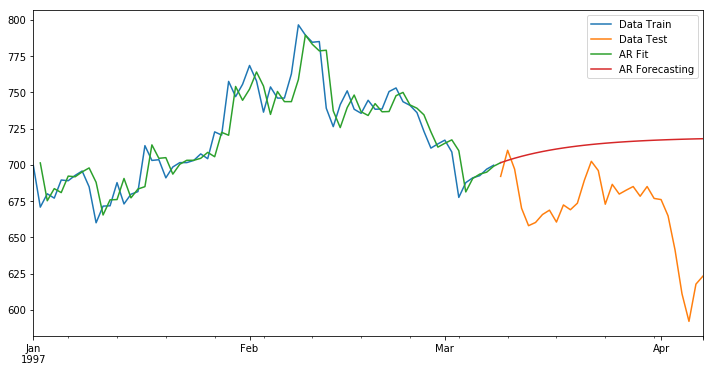

In [27]:
plt.figure(figsize=(V,H))

# plot data train and test
serie_train.plot(label='Data Train')

serie_test.plot(label='Data Test')

predict = model_fitted.predict(start=model_fitted.k_ar, end=len(serie_train), dynamic=False)
predict.plot(label='AR Fit')

predict = model_fitted.predict(start=serie_test.index[0], end=serie_test.index[-1], dynamic=False)
predict.plot(label='AR Forecasting')

#to show
plt.legend()
plt.show()

In [28]:
print('MSE = ', mean_squared_error(serie_test, predict))

MSE =  2828.150540549692


### ARMA

lags used:  6
parameters:  const      711.660323
ar.L1.y      0.677542
ar.L2.y     -0.650899
ar.L3.y      0.675654
ar.L4.y      0.091817
ar.L5.y     -0.181071
ar.L6.y      0.222752
ma.L1.y      0.203097
ma.L2.y      1.000000
dtype: float64


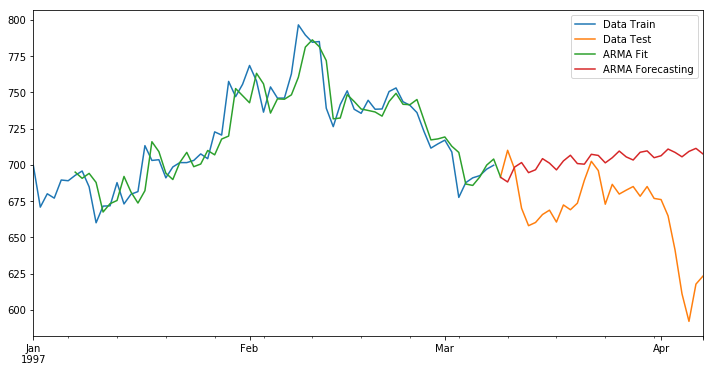

In [29]:
# train ARMA
model = ARMA(serie_train, order=(6, 2))
model_fitted = model.fit()

# parameters used
print("lags used: ", model_fitted.k_ar)
print("parameters: ", model_fitted.params)

plt.figure(figsize=(V,H))

# plot data train and test
serie_train.plot(label='Data Train')

serie_test.plot(label='Data Test')

predict = model_fitted.predict(start=model_fitted.k_ar, end=len(serie_train), dynamic=False)
predict.plot(label='ARMA Fit')

predict = model_fitted.predict(start=serie_test.index[0], end=serie_test.index[-1], dynamic=False)
predict.plot(label='ARMA Forecasting')

#to show
plt.legend()
plt.show()

In [30]:
print('MSE = ', mean_squared_error(serie_test, predict))

MSE =  2087.183249156995


### ARIMA

In [53]:
# train ARIMA
model = ARIMA(serie_train, order=(3, 1, 1))
model_fitted = model.fit()

# parameters used
print("lags used: ", model_fitted.k_ar)
print("parameters: ", model_fitted.params)

lags used:  3
parameters:  const        0.043092
ar.L1.D.y   -1.091599
ar.L2.D.y   -0.142003
ar.L3.D.y   -0.050267
ma.L1.D.y    1.000000
dtype: float64


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


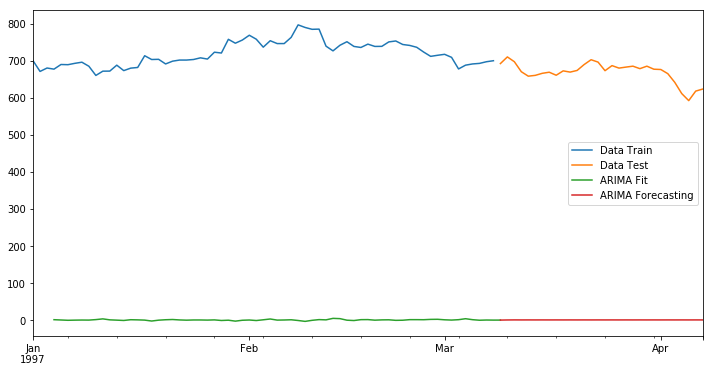

aic: 547.42117
MSE =  447684.7128249862


In [54]:
plt.figure(figsize=(V,H))

# plot data train and test
serie_train.plot(label='Data Train')

serie_test.plot(label='Data Test')

predict = model_fitted.predict(start=model_fitted.k_ar, end=len(serie_train), dynamic=False)
predict.plot(label='ARIMA Fit')

predict = model_fitted.predict(start=serie_test.index[0], end=serie_test.index[-1], dynamic=False)
predict.plot(label='ARIMA Forecasting')

#to show
plt.legend()
plt.show()

print('aic: {:6.5f}'.format(model_fitted.aic))

print('MSE = ', mean_squared_error(serie_test, predict))

In [40]:
best_aic = np.inf 
best_order = None
best_mdl = None

pq_rng = range(5) # [0,1,2,3,4]
d_rng = range(2) # [0,1]
for i in pq_rng:
    for d in d_rng:
        for j in pq_rng:
            try:
                tmp_mdl = ARIMA(serie_train, order=(i,d,j)).fit(method='mle', trend='nc')
                tmp_aic = tmp_mdl.aic
                if tmp_aic < best_aic:
                    best_aic = tmp_aic
                    best_order = (i, d, j)
                    best_mdl = tmp_mdl
            except: continue


print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))

aic: 538.41172 | order: (3, 1, 1)


aic: 538.41172 | order: (3, 1, 1)


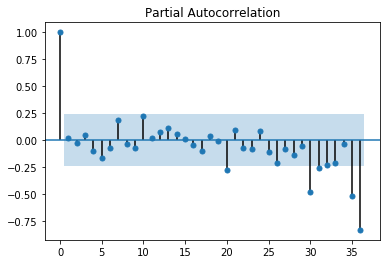

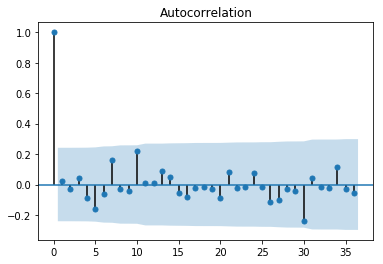

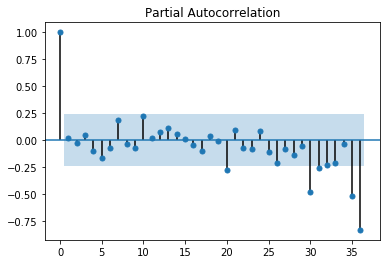

In [41]:
print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))

# ARIMA model resid plot
plot_acf(best_mdl.resid, lags=36)

plot_pacf(best_mdl.resid, lags=36)

### GARCH

In [42]:
from arch import arch_model

am = arch_model(s_diff, mean='Zero', vol='GARCH')
res = am.fit()
print(res.summary())

Iteration:      1,   Func. Count:      5,   Neg. LLF: 389.50104793354546
Iteration:      2,   Func. Count:     12,   Neg. LLF: 389.49665659999755
Iteration:      3,   Func. Count:     17,   Neg. LLF: 389.43997189601
Iteration:      4,   Func. Count:     23,   Neg. LLF: 389.43996644932804
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 389.4399664493286
            Iterations: 4
            Function evaluations: 23
            Gradient evaluations: 4
                       Zero Mean - GARCH Model Results                        
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.010
Vol Model:                      GARCH   Log-Likelihood:               -389.440
Distribution:                  Normal   AIC:                           784.880
Method:            Maximum Likelihood   BIC:                           792.573
                             

In [43]:
# Now we can fit the arch model using the best fit arima model parameters
p_ = best_order[0]
o_ = best_order[1]
q_ = best_order[2]

# Using student T distribution usually provides better fit
am = arch_model(s_diff, mean='Zero', vol='GARCH', p=p_, o=o_, q=q_, dist='StudentsT')
res = am.fit(update_freq=5, disp='off')
print(res.summary())

                        Zero Mean - GJR-GARCH Model Results                         
Dep. Variable:                         None   R-squared:                       0.000
Mean Model:                       Zero Mean   Adj. R-squared:                  0.010
Vol Model:                        GJR-GARCH   Log-Likelihood:               -386.037
Distribution:      Standardized Student's t   AIC:                           786.074
Method:                  Maximum Likelihood   BIC:                           804.024
                                              No. Observations:                   96
Date:                      Fri, Sep 27 2019   Df Residuals:                       89
Time:                              02:03:18   Df Model:                            7
                             Volatility Model                             
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega     

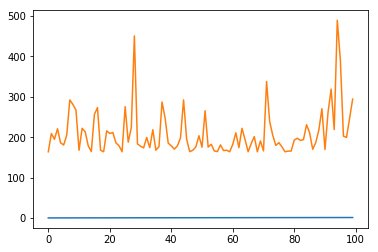

In [44]:
n_test = 100

# forecast the test set
yhat = am.forecast(horizon=n_test, method='simulation', simulations=5, params=res.params)

# plot the actual variance
var = [i*0.01 for i in range(0,100)]
plt.plot(var[-n_test:])

# plot forecast variance
plt.plot(yhat.variance.values[-1, :])
plt.show()

<bound method ARCHModelResult.summary of                    Constant Mean - GJR-GARCH Model Results                    
Dep. Variable:                   None   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -271.713
Distribution:                  Normal   AIC:                           557.426
Method:            Maximum Likelihood   BIC:                           572.859
                                        No. Observations:                   67
Date:                Fri, Sep 27 2019   Df Residuals:                       60
Time:                        02:03:27   Df Model:                            7
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.1029     41.

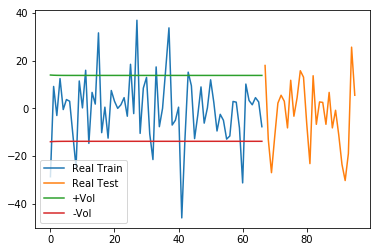

In [45]:
# training a Garch model
garch = arch_model(s_diff_train, vol='GARCH', p=p_, o=o_, q=q_ ).fit( disp='off')

# printing the statisticals
print(garch.summary)

# plotting the modelling
plt.plot(s_diff_train, label='Real Train')
plt.plot(s_diff_test, label='Real Test')
plt.plot(garch._volatility, label = '+Vol')
plt.plot(-garch._volatility, label = '-Vol')
plt.legend(loc='best')
plt.show()

### KALMAN